In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\rachi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import torch

TASK-1 Question-1

In [4]:
np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [76]:
x1_tensor= torch.from_numpy(x1)
y_tensor= torch.from_numpy(y)
theta_1 = torch.tensor(1.0, requires_grad=True)  
theta_0 = torch.tensor(0.0, requires_grad=True) 
y_hat = theta_0 + theta_1*x1_tensor
MSE= torch.mean((y_tensor-y_hat)**2)
grad_theta_0, grad_theta_1 = torch.autograd.grad(outputs=MSE, inputs=[theta_0, theta_1])
print(f"Gradient with respect to θ0 (theta_0.grad): {grad_theta_0}")
print(f"Gradient with respect to θ1 (theta_1.grad): {grad_theta_1}")


Gradient with respect to θ0 (theta_0.grad): -7.616434574127197
Gradient with respect to θ1 (theta_1.grad): -0.39361661672592163


TASK-1 Question-2

In [77]:
theta_1 = torch.tensor(1.0, requires_grad=True)  
theta_0 = torch.tensor(0.0, requires_grad=True)
n= len(x1_tensor)
estimated_mse_grad_theta_1=0
estimated_mse_grad_theta_0=0
for i in range(n):
    y_hat = theta_0 + theta_1*x1_tensor[i]
    mse = (y_tensor[i]-y_hat)**2
    grad_theta_0, grad_theta_1 = torch.autograd.grad(outputs=mse, inputs=[theta_0, theta_1],allow_unused=True)
    estimated_mse_grad_theta_0+= grad_theta_0/n
    estimated_mse_grad_theta_1+= grad_theta_1/n
        
print(f"Estimated Gradient with respect to θ0 (theta_0.grad): {estimated_mse_grad_theta_0}")
print(f"Estimated Gradient with respect to θ1 (theta_1.grad): {estimated_mse_grad_theta_1}")    

Estimated Gradient with respect to θ0 (theta_0.grad): -7.616434097290039
Estimated Gradient with respect to θ1 (theta_1.grad): -0.393616646528244


We can see that they are comming exactly same

TASK-1 Question-3

In [7]:
# Batch Gradient decent
theta_1 = torch.tensor(1.0, requires_grad=True)  
theta_0 = torch.tensor(0.0, requires_grad=True)
y_hat = theta_0 + theta_1*x1_tensor
MSE= torch.mean((y_tensor-y_hat)**2)
e=0.0001
prev_MSE=-1
alpha= 0.1
count_epoch=0
loss_full_batch=[]
while(prev_MSE==-1 or abs(MSE.item()-prev_MSE)>=0.0001 ) :
    MSE.backward()
    with torch.no_grad():
        theta_1 -= alpha * theta_1.grad
        theta_0 -= alpha * theta_0.grad
    theta_1.grad.zero_()
    theta_0.grad.zero_()
    y_hat = theta_0 + theta_1 * x1_tensor
    prev_MSE = MSE.item()
    MSE = torch.mean((y_tensor - y_hat) ** 2)
    loss_full_batch.append(MSE.item())
    count_epoch+=1
print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {MSE.item()}")
print(f"Optimized θ0: {theta_0.item()}, Optimized θ1: {theta_1.item()}") 

Number of epochs: 60
Final MSE: 0.5964842649081057
Optimized θ0: 3.944783926010132, Optimized θ1: 2.633943796157837


In [8]:
theta_1 = torch.tensor(1.0, requires_grad=True)  
theta_0 = torch.tensor(0.0, requires_grad=True)  
alpha = 0.1
e = 0.0001
prev_MSE = -1
count_epoch = 0
n = len(x1_tensor)
loss_stochastic=[]
while prev_MSE == -1 or abs(mse.item() - prev_MSE) >= e:
    prev_MSE = mse.item()
    total_mse = 0
    for i in range(n):
        y_hat = theta_0 + theta_1 * x1_tensor[i]
        mse = (y_tensor[i] - y_hat) ** 2
        mse.backward()
        total_mse += mse.item()
        with torch.no_grad():
            theta_1 -= alpha * theta_1.grad
            theta_0 -= alpha * theta_0.grad
        theta_1.grad.zero_()
        theta_0.grad.zero_()
    mse = torch.tensor(total_mse / n)
    loss_stochastic.append(mse.item())
    count_epoch += 1

print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {mse.item()}")
print(f"Optimized θ0: {theta_0.item()}, Optimized θ1: {theta_1.item()}")

Number of epochs: 5
Final MSE: 0.739696741104126
Optimized θ0: 4.333846092224121, Optimized θ1: 2.733132839202881


In [9]:
theta_1 = torch.tensor(1.0, requires_grad=True)  
theta_0 = torch.tensor(0.0, requires_grad=True)  
alpha = 0.1
e = 0.0001
prev_MSE = -1
count_epoch = 0
n = len(x1_tensor)
mini_batch_size=5
loss_mini_batch=[]
while prev_MSE == -1 or abs(mse.item() - prev_MSE) >= e:
    prev_MSE = mse.item()
    total_mse = 0
    for i in range(0,n,mini_batch_size):
        y_hat = theta_0 + theta_1 * x1_tensor[i:i+mini_batch_size]
        mse = torch.mean((y_tensor[i:i+mini_batch_size] - y_hat) ** 2)
        mse.backward()
        total_mse += mse.item()
        with torch.no_grad():
            theta_1 -= alpha * theta_1.grad
            theta_0 -= alpha * theta_0.grad
        theta_1.grad.zero_()
        theta_0.grad.zero_()
    mse = torch.tensor(total_mse / n)
    loss_mini_batch.append(mse.item())
    count_epoch += 1

print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {mse.item()}")
print(f"Optimized θ0: {theta_0.item()}, Optimized θ1: {theta_1.item()}")

Number of epochs: 8
Final MSE: 0.12546277046203613
Optimized θ0: 4.006011009216309, Optimized θ1: 2.6678314208984375


We can see that batch gradient descent has the largest number of epoch used to reach the minimum loss value

Number of epochs: 60
Final MSE: 0.5964842649081057
Optimized θ0: 3.944783926010132, Optimized θ1: 2.633943796157837


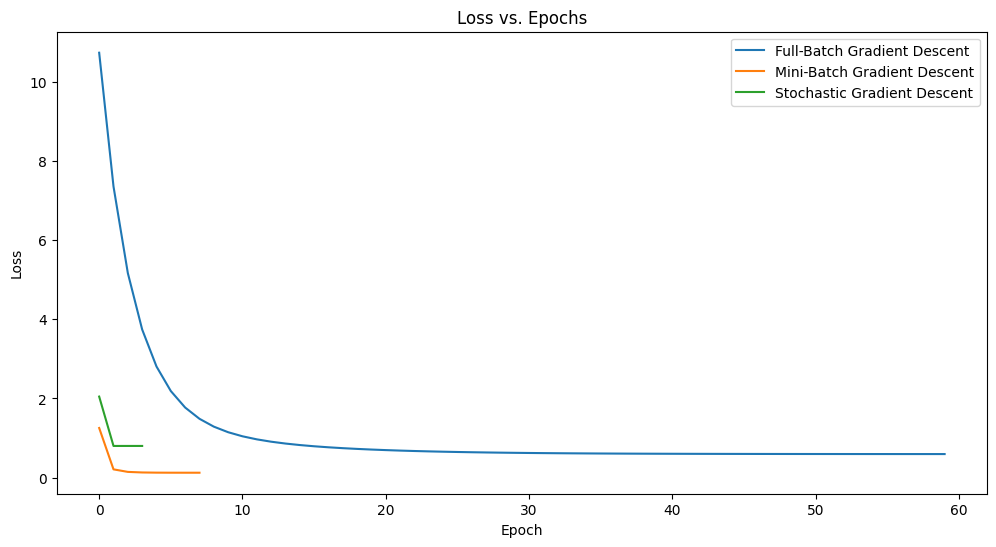

In [80]:
# Batch Gradient decent
theta_1 = torch.tensor(1.0, requires_grad=True)  
theta_0 = torch.tensor(0.0, requires_grad=True)
y_hat = theta_0 + theta_1*x1_tensor
MSE= torch.mean((y_tensor-y_hat)**2)
e=0.0001
prev_MSE=-1
alpha= 0.1
count_epoch=0
loss_full_batch=[]
theta_0_history=[]
theta_1_history=[]
while(prev_MSE==-1 or abs(MSE.item()-prev_MSE)>=0.0001 ) :
    MSE.backward()
    with torch.no_grad():
        theta_1 -= alpha * theta_1.grad
        theta_0 -= alpha * theta_0.grad
    theta_1.grad.zero_()
    theta_0.grad.zero_()
    y_hat = theta_0 + theta_1 * x1_tensor
    prev_MSE = MSE.item()
    MSE = torch.mean((y_tensor - y_hat) ** 2)
    loss_full_batch.append(MSE.item())
    count_epoch+=1
    theta_0_history.append(theta_0.item())
    theta_1_history.append(theta_1.item())
    
print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {MSE.item()}")
print(f"Optimized θ0: {theta_0.item()}, Optimized θ1: {theta_1.item()}") 




plt.figure(figsize=(12, 6))
plt.plot(loss_full_batch, label='Full-Batch Gradient Descent')
plt.plot(loss_mini_batch, label='Mini-Batch Gradient Descent')
plt.plot(loss_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()


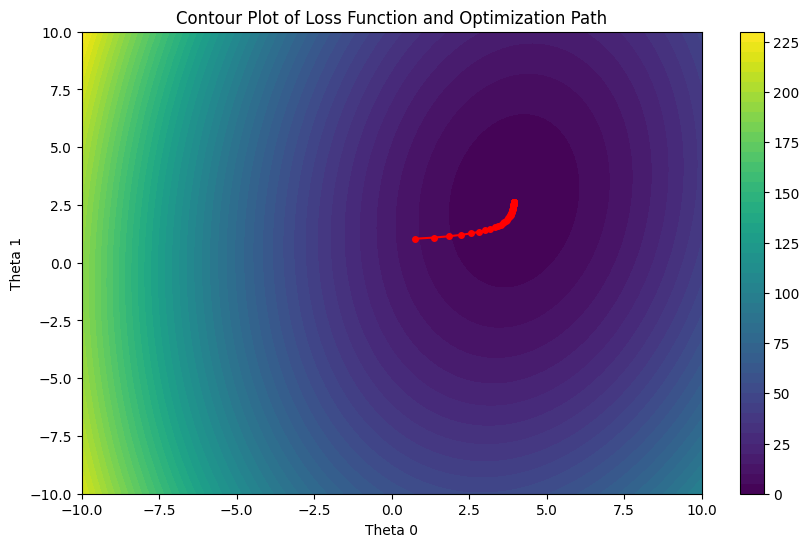

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function for linear regression
def loss_function(theta_0, theta_1, x, y):
    y_pred = theta_1 * x + theta_0
    return np.mean((y - y_pred) ** 2)

# Create a grid of theta values
theta_0_values = np.linspace(-10, 10, 100)
theta_1_values = np.linspace(-10, 10, 100)
theta_0_grid, theta_1_grid = np.meshgrid(theta_0_values, theta_1_values)
loss_grid = np.zeros_like(theta_0_grid)

# Compute the loss over the grid
for i in range(theta_0_grid.shape[0]):
    for j in range(theta_0_grid.shape[1]):
        loss_grid[i, j] = loss_function(theta_0_grid[i, j], theta_1_grid[i, j], x1, y)

# Plot the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.plot(theta_0_history, theta_1_history, 'ro-', markersize=4)  # Plot optimization path
plt.title('Contour Plot of Loss Function and Optimization Path')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.show()


TASK-1 Question-4

In [19]:
theta_1 = torch.tensor(1.0, requires_grad=True)
theta_0 = torch.tensor(0.0, requires_grad=True)
y_hat = theta_0 + theta_1 * x1_tensor
MSE = torch.mean((y_tensor - y_hat) ** 2)
prev_MSE = -1
alpha = 0.1
count_epoch = 0
loss_full_batch = []
momentum = 0.6
change_1 = 0 
change_0 = 0
theta_0_list = []
theta_1_list = [] 
while prev_MSE == -1 or abs(MSE.item() - prev_MSE) >= 0.0001:
    MSE.backward()
    with torch.no_grad():
        change_1 = momentum * change_1 + alpha * theta_1.grad
        theta_1 -= change_1
        change_0 = momentum * change_0 + alpha * theta_0.grad
        theta_0 -= change_0
    theta_1.grad.zero_()
    theta_0.grad.zero_()
    y_hat = theta_0 + theta_1 * x1_tensor
    prev_MSE = MSE.item()
    MSE = torch.mean((y_tensor - y_hat) ** 2)
    loss_full_batch.append(MSE.item())
    count_epoch += 1
    theta_0_list.append(theta_0.item())
    theta_1_list.append(theta_1.item())

print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {MSE.item()}")
print(f"Optimized θ0: {theta_0.item()}, Optimized θ1: {theta_1.item()}")


Number of epochs: 19
Final MSE: 0.5959276851483553
Optimized θ0: 3.9583089351654053, Optimized θ1: 2.665257215499878


In [31]:
theta_1 = torch.tensor(1.0, requires_grad=True)  
theta_0 = torch.tensor(0.0, requires_grad=True)  
alpha = 0.1
e = 0.0001
prev_MSE = -1
count_epoch = 0
n = len(x1_tensor)
loss_stochastic=[]
momentum = 0.6
change_1 = 0 
change_0 = 0 
theta_0_list = []
theta_1_list = []
grad_0_list = []
grad_1_list = []
momentum_0_list = []
momentum_1_list = []
epochs_to_plot = [0,1,2,3,4,5]
while prev_MSE == -1 or abs(mse.item() - prev_MSE) >= e:
    prev_MSE = mse.item()
    total_mse = 0
    for i in range(n):
        y_hat = theta_0 + theta_1 * x1_tensor[i]
        mse = (y_tensor[i] - y_hat) ** 2
        mse.backward()
        total_mse += mse.item()
        with torch.no_grad():
            grad_theta_0 = theta_0.grad.item()
            grad_theta_1 = theta_1.grad.item()
            change_1 = momentum * change_1 + alpha * theta_1.grad
            theta_1 -= change_1
            change_0 = momentum * change_0 + alpha * theta_0.grad
            theta_0 -= change_0
        theta_1.grad.zero_()
        theta_0.grad.zero_()
    theta_0_list.append(theta_0.item())
    theta_1_list.append(theta_1.item())
    grad_0_list.append(grad_theta_0)
    grad_1_list.append(grad_theta_1)
    momentum_0_list.append(change_0.item())
    momentum_1_list.append(change_1.item())
    mse = torch.tensor(total_mse / n)
    loss_stochastic.append(mse.item())
    count_epoch += 1

print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {mse.item()}")
print(f"Optimized θ0: {theta_0.item()}, Optimized θ1: {theta_1.item()}")

Number of epochs: 4
Final MSE: 0.801685094833374
Optimized θ0: 4.380577564239502, Optimized θ1: 2.659557580947876


On comparing vanilla gradient descent with momentum and full-batch gradient descent , we observe that momentum optimization do a very better job as average epoches for the former is 19 while it is 60 for the latter. On comparing it with schotastic gradient descent and schotastic gradient descent with momentum optimization , the latter performs far more better as it reaches the optimal value in just 4 epoaches.

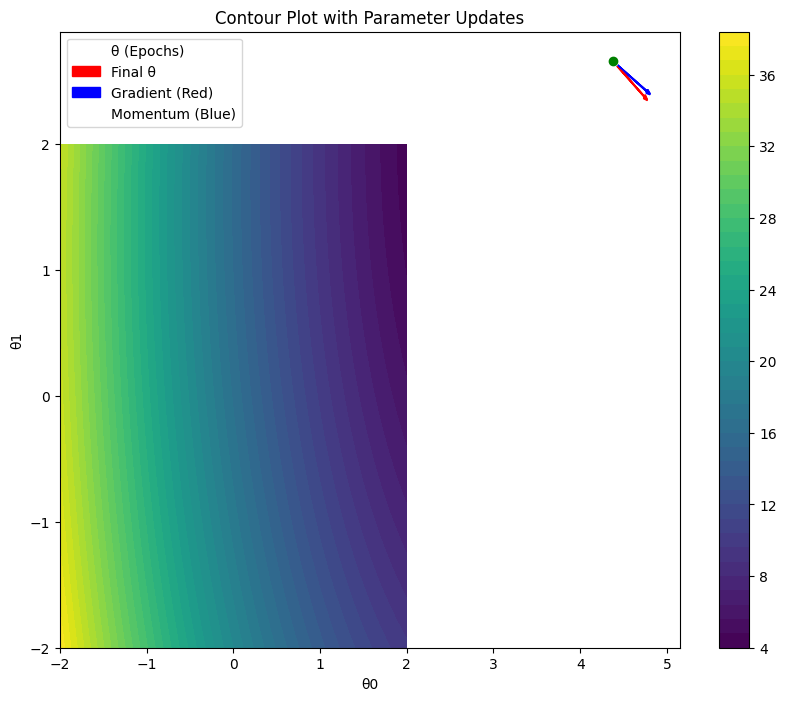

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function for linear regression
def loss_function(theta_0, theta_1, x, y):
    y_pred = theta_1 * x + theta_0
    return np.mean((y - y_pred) ** 2)

# Create a grid of theta values
theta_0_values = np.linspace(-10, 10, 100)
theta_1_values = np.linspace(-10, 10, 100)
theta_0_grid, theta_1_grid = np.meshgrid(theta_0_values, theta_1_values)
loss_grid = np.zeros_like(theta_0_grid)

# Compute the loss over the grid
for i in range(theta_0_grid.shape[0]):
    for j in range(theta_0_grid.shape[1]):
        loss_grid[i, j] = loss_function(theta_0_grid[i, j], theta_1_grid[i, j], x1, y)

# Plot the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.plot(theta_0_history_momentum, theta_1_history_momentum, 'ro-', markersize=4)  # Plot optimization path
plt.title('Contour Plot of Loss Function with Momentum and Optimization Path')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.show()
